In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [12]:
# Load Data
df = pd.read_csv('ESSData_Thinkful.csv')
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


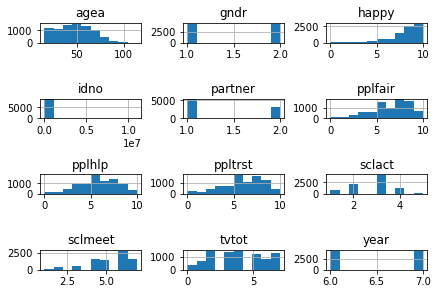

In [21]:
# plot distributions

plt.figure(figsize=(100,100))
df.hist(sharey=False,sharex=False)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [27]:
country_list = list(df['cntry'].unique())
print(country_list)

['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']


In [67]:
#Did people become less trusting from 2012 to 2014? Compute results for each country in the sample
# use parametric test based on distribution, use paired 

for country in country_list:
    df_12 = df.loc[(df['year'] == 6) & (df['cntry'] == country)].sort_values(by=['idno'])
    sample_12 = list(df_12['ppltrst'].dropna())
    df_14 = df.loc[(df['year'] == 7) & (df['cntry'] == country)].sort_values(by=['idno'])
    sample_14 = list(df_12['ppltrst'].dropna())
    
    print(country,": ", stats.ttest_rel(sample_12,sample_14))
    
    
# Setting the three non-data columns to work as multi-indices. 
# This makes it much easier to get subsections of stacked data.
data_test = df.set_index(['cntry','size','variability'])

# Storing our t-values and p-values (we'll get to p-values in a sec).
tvalues=[]
pvalues=[]

#For each combination of sample size and variability, compare the two groups using a t-test
for size in sizes:
    for var in variability:
        a = data_test['data'].xs(('group1',size,var),level=('groups','size','variability'))
        b = data_test['data'].xs(('group2',size,var),level=('groups','size','variability'))
        tval,pval=stats.ttest_ind(b, a,equal_var=True)
        tvalues.append(tval)
        pvalues.append(pval)



CH :  Ttest_relResult(statistic=nan, pvalue=nan)
CZ :  Ttest_relResult(statistic=nan, pvalue=nan)
DE :  Ttest_relResult(statistic=nan, pvalue=nan)
ES :  Ttest_relResult(statistic=nan, pvalue=nan)
NO :  Ttest_relResult(statistic=nan, pvalue=nan)
SE :  Ttest_relResult(statistic=nan, pvalue=nan)


C:\Users\stace\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\stace\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\stace\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [68]:
#Did people become happier from 2012 to 2014? Compute results for each country in the sample.
for country in country_list:
    df_12 = df.loc[(df['year'] == 6) & (df['cntry'] == country)].sort_values(by=['idno'])
    sample_12 = list(df_12['happy'].dropna())
    df_14 = df.loc[(df['year'] == 7) & (df['cntry'] == country)].sort_values(by=['idno'])
    sample_14 = list(df_12['happy'].dropna())
    
    print(country,": ", stats.ttest_rel(sample_12,sample_14))
    
    

CH :  Ttest_relResult(statistic=nan, pvalue=nan)
CZ :  Ttest_relResult(statistic=nan, pvalue=nan)
DE :  Ttest_relResult(statistic=nan, pvalue=nan)
ES :  Ttest_relResult(statistic=nan, pvalue=nan)
NO :  Ttest_relResult(statistic=nan, pvalue=nan)
SE :  Ttest_relResult(statistic=nan, pvalue=nan)


C:\Users\stace\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\stace\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\stace\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [77]:
#Who reported watching more TV in 2012, men or women?
df_men = df.loc[(df['gndr'] == 1) & (df['year']==6)]
sample_men = list(df_men['tvtot'].dropna())
df_women = df.loc[(df['gndr'] == 2) & (df['year']==6)]
sample_women = list(df_women['tvtot'].dropna())
print(df_men['tvtot'].mean())
tval,pval=stats.ttest_ind(sample_men, sample_women,equal_var=True)
print(df_women['tvtot'].mean())
print(tval,pval)

# It appears they watched the same amount of tv

3.901906090190609
3.944392523364486
-0.689992810921 0.49023604027


In [85]:
#Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
# perception of fairness appears to be normally distributed
# partner=1 lives with a partner, 2 does not
df_partner = df.loc[(df['partner'] == 2.0) & (df['year']==6)]
sample_partner = list(df_partner['pplfair'].dropna())
df_no_partner = df.loc[(df['partner'] == 1.0) & (df['year']==6)]
sample_no_partner = list(df_no_partner['pplfair'].dropna())

tval,pval=stats.ttest_ind(sample_no_partner, sample_partner,equal_var=True)
print(df_no_partner['pplfair'].mean())
print(df_partner['pplfair'].mean())
print(tval,pval)

# people with a partner tend to think other people are fair

6.080736012016523
5.856965174129353
3.32010339704 0.000907395260988


In [87]:
#Pick three or four of the countries in the sample and compare how often people 
#met socially in 2014. Are there differences, and if so, which countries stand out?

country_subset = ['CH', 'CZ', 'DE']
df_CH = df.loc[(df['year'] == 7) & (df['cntry'] == 'CH')]
print(df_CH['sclmeet'].mean())
# sample_CH = list(df_CH['sclmeet'])

df_CZ = df.loc[(df['year'] == 7) & (df['cntry'] == 'CZ')]
print(df_CZ['sclmeet'].mean())
# sample_CZ = list(df_CZ['sclmeet'])

df_DE = df.loc[(df['year'] == 7) & (df['cntry'] == 'DE')]
print(df_DE['sclmeet'].mean())
# sample_DE = list(df_DE['sclmeet'])


F, p = stats.f_oneway(df_CH['sclmeet'], df_CZ['sclmeet'], df_DE['sclmeet'])

# The F statistic.
print(F)

# The probability. A p < .05 would lead us to believe the group means were
# not all similar in the population.
print(p)

5.160621761658031
4.445801526717557
4.428571428571429
nan
nan


In [ ]:
#Pick three or four of the countries in the sample and compare how often people took part in social activities, 
#relative to others their age, in 2014. Are there differences, and if so, which countries stand out?


# ask zack!